<a href="https://colab.research.google.com/github/medjbersoundous/exam-scores-dataset-preprocessing/blob/main/challenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [5]:
students_exam_score =pd.read_csv('/content/students_exam_score.csv')
students_exam_score.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


 **check if there's a duplication in the dataset**

In [6]:
students_exam_score.duplicated().sum()

0

`so there are no duplicated values to remove it `



 **so here we gonne check if there are null values**

In [7]:
students_exam_score.isna().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
MathScore,0
ReadingScore,0
WritingScore,0




```
so we find that there are no null values
```



 **now we gonna see the summary of the dataset**

In [8]:
students_exam_score.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


In [9]:
#see the columns info
students_exam_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


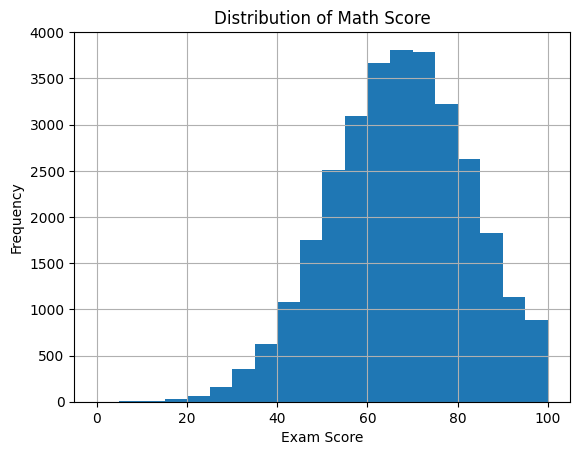

In [10]:
students_exam_score['MathScore'].hist(bins=20)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Score')
plt.show()

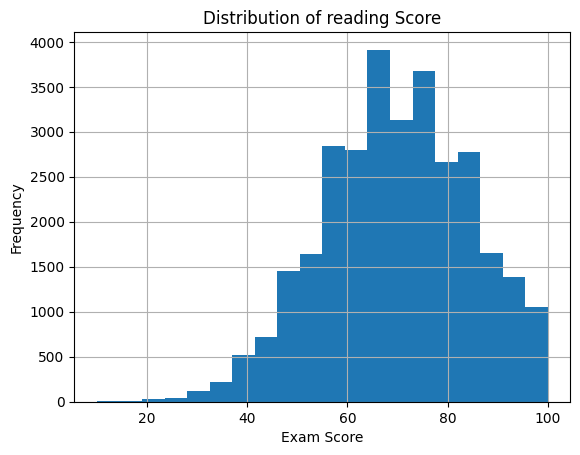

In [11]:
students_exam_score['ReadingScore'].hist(bins=20)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of reading Score')
plt.show()

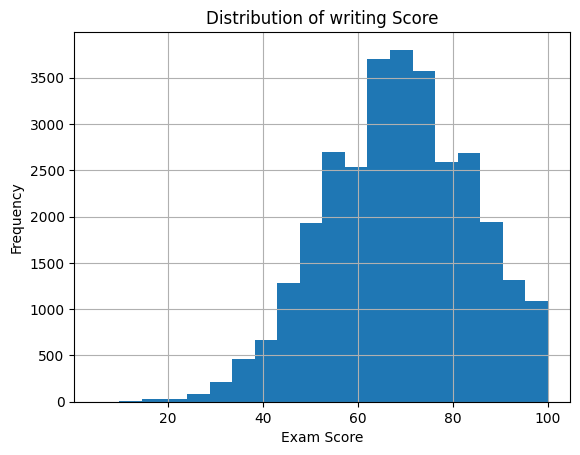

In [12]:
students_exam_score['WritingScore'].hist(bins=20)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of writing Score')
plt.show()

**so here we gonna check for outliers with boxplot**



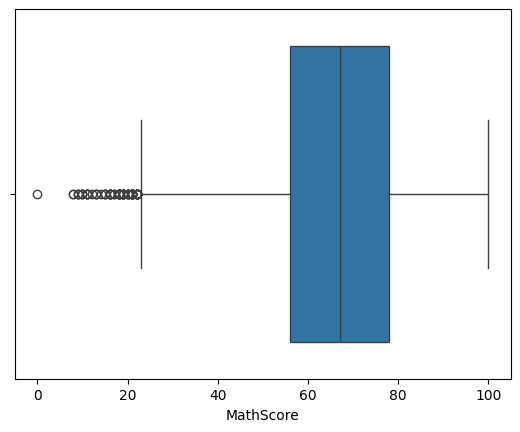

In [13]:
sns.boxplot(x=students_exam_score['MathScore'])
plt.show()

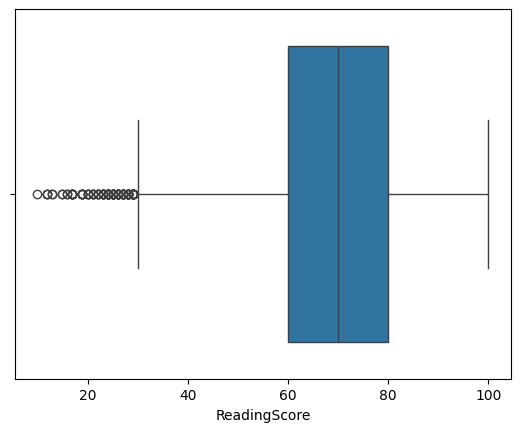

In [14]:
sns.boxplot(x=students_exam_score['ReadingScore'])
plt.show()

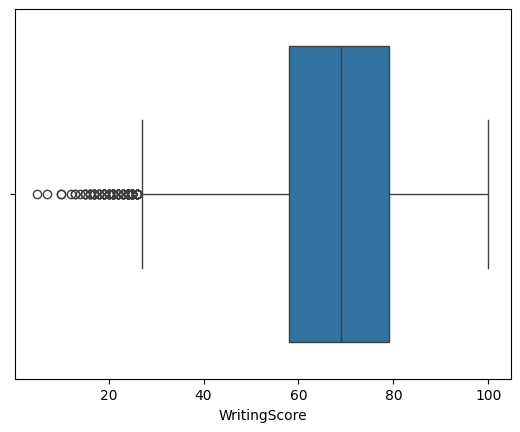

In [15]:
sns.boxplot(x=students_exam_score['WritingScore'])
plt.show()

In [84]:
#here we gonna check for outliers with staticals method which is calculating the iqr
columns = ['MathScore', 'ReadingScore', 'WritingScore']

for column in columns:
    Q1 = students_exam_score[column].quantile(0.25)
    Q3 = students_exam_score[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = students_exam_score[(students_exam_score[column] < lower_bound) | (students_exam_score[column] > upper_bound)]
    print(f"Outliers detected for {column}:")
    print(outliers)
    print(f"Number of outliers in {column}: {len(outliers)}")

Outliers detected for MathScore:
       Unnamed: 0  Gender EthnicGroup        ParentEduc     LunchType  \
17             17  female     group B  some high school  free/reduced   
59             59  female     group C  some high school  free/reduced   
145           145  female     group C      some college  free/reduced   
787           787  female     group B      some college      standard   
980           980  female     group B       high school  free/reduced   
...           ...     ...         ...               ...           ...   
29696          36  female     group B      some college  free/reduced   
30097         445  female     group C  some high school  free/reduced   
30105         453  female     group C      some college  free/reduced   
30161         510  female     group D       high school  free/reduced   
30589         947    male     group A      some college  free/reduced   

        TestPrep  MathScore  ReadingScore  WritingScore  
17          none         18     

In [66]:
# So here we gonna make a copy of the dataset to work on it and to not make changes to the original one
# We gonna do the same as the previous step + removing the outliers detected for each column
columns = ['MathScore', 'ReadingScore', 'WritingScore']
students_exam_score_cleaned = students_exam_score.copy()
for column in columns:
    Q1 = students_exam_score_cleaned[column].quantile(0.25)
    Q3 = students_exam_score_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    students_exam_score_cleaned = students_exam_score_cleaned[
        (students_exam_score_cleaned[column] >= lower_bound) &
        (students_exam_score_cleaned[column] <= upper_bound)
    ]
students_exam_score_cleaned.head()

Dataset after removing outliers:
   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           0  female     group B   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   
4           4    male     group C        some college      standard   

    TestPrep  MathScore  ReadingScore  WritingScore  
0       none         72            72            74  
1  completed         69            90            88  
2       none         90            95            93  
3       none         47            57            44  
4       none         76            78            75  


Original dataset shape: (30641, 9)
Cleaned dataset shape: (30476, 9)


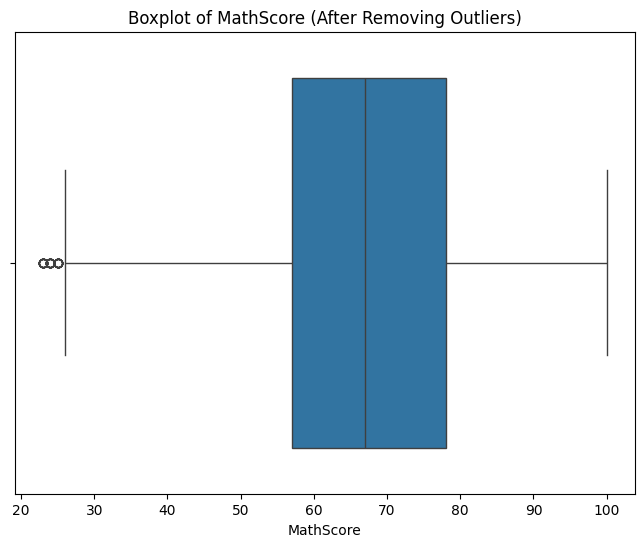

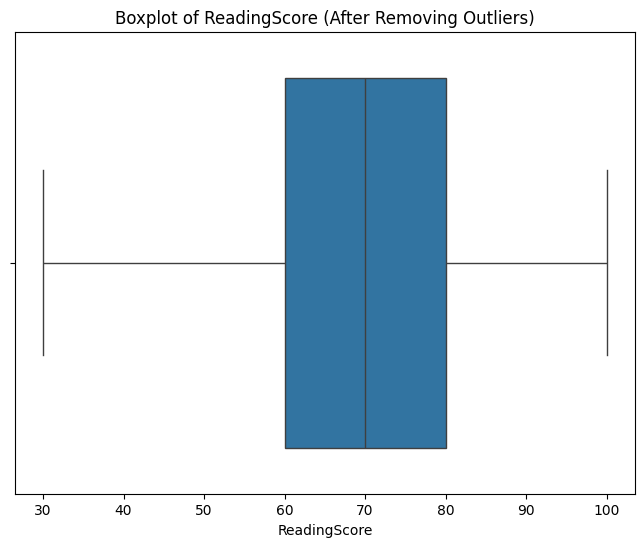

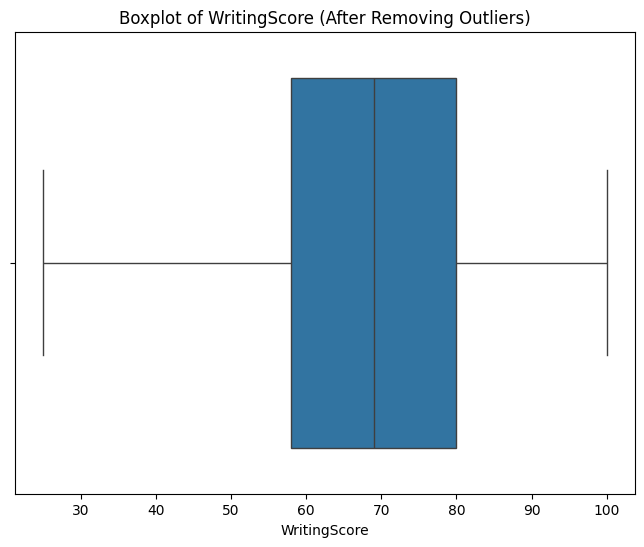

In [62]:
# Here we gonna compare the shape of the original dataset with the cleaned one after removing the outliers
print("Original dataset shape:", students_exam_score.shape)
print("Cleaned dataset shape:", students_exam_score_cleaned.shape)

# Just for better visualization we gonna  see the cleaned dataset for each column in boxplots
columns = ['MathScore', 'ReadingScore', 'WritingScore']
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=students_exam_score_cleaned[column])
    plt.title(f'Boxplot of {column} (After Removing Outliers)')
    plt.show()


**So here we gonna get the unique values of each column to decide which encoding we gonna use**

In [31]:
students_exam_score_cleaned['LunchType'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [32]:
students_exam_score_cleaned['EthnicGroup'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [33]:
students_exam_score_cleaned['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [34]:
students_exam_score['TestPrep'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
# for lunch type and test preparation we gonna to use label encoding because these columns contain categorical data
# with two possible values it's important because the encoded values (0 and 1) will help the model understand
# the significance of these categories where 1 can represent a good or true category like completed or
# standard and 0 represents the other category like none or free/reduced
# for parent education we gonna use ordinal encoding because the categories have a natural order
# with high school being less than some college and some college being less than a bachelor’s degree etc...
# so we can say  ordinal encoding is appropriate because it allows us to preserve the inherent ranking of these categories
# for ethnic group and gender we gonna use one hot Encoding because these columns contain nominal categorical variables
# that don’t have an inherent order or ranking so he gonna create a binary column for each category


In [67]:
label_encoder = LabelEncoder()
students_exam_score_cleaned['TestPrep_encoded'] = label_encoder.fit_transform(students_exam_score_cleaned['TestPrep'])
students_exam_score_cleaned[['TestPrep', 'TestPrep_encoded']].head()

,TestPrep,TestPrep_encoded
0,none,1
1,completed,0
2,none,1
3,none,1
4,none,1


In [70]:
# The encoding originally assigned 1 to none and 0 to completed which is not what we want
# So we gonna change the values to make completed to 1 and none to 0
students_exam_score_cleaned['TestPrep_encoded'] = students_exam_score_cleaned['TestPrep_encoded'].replace({0: 1, 1: 0})
students_exam_score_cleaned['TestPrep_encoded'].head()


,TestPrep_encoded
0,0
1,1
2,0
3,0
4,0


In [71]:
label_encoder = LabelEncoder()
students_exam_score_cleaned['LunchType_encoded'] = label_encoder.fit_transform(students_exam_score_cleaned['LunchType'])
students_exam_score_cleaned.head()

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           0  female     group B   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   
4           4    male     group C        some college      standard   

    TestPrep  MathScore  ReadingScore  WritingScore  TestPrep_encoded  \
0       none         72            72            74                 0   
1  completed         69            90            88                 1   
2       none         90            95            93                 0   
3       none         47            57            44                 0   
4       none         76            78            75                 0   

   LunchType_encoded  
0                  1  
1                  1  
2                  1  
3                  0  
4                  

**now we gonna implement one hot encoding**

In [72]:
students_exam_score_cleaned = pd.get_dummies(students_exam_score_cleaned, columns=['Gender'], dtype=int)
students_exam_score_cleaned.head()


,Unnamed: 0,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,TestPrep_encoded,LunchType_encoded,Gender_female,Gender_male
0,0,group B,bachelor's degree,standard,none,72,72,74,0,1,1,0
1,1,group C,some college,standard,completed,69,90,88,1,1,1,0
2,2,group B,master's degree,standard,none,90,95,93,0,1,1,0
3,3,group A,associate's degree,free/reduced,none,47,57,44,0,0,0,1
4,4,group C,some college,standard,none,76,78,75,0,1,0,1


In [73]:
students_exam_score_cleaned = pd.get_dummies(students_exam_score_cleaned, columns=['EthnicGroup'], prefix=['EthnicGroup'])
students_exam_score_cleaned.head()

,Unnamed: 0,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,TestPrep_encoded,LunchType_encoded,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E
0,0,bachelor's degree,standard,none,72,72,74,0,1,1,0,False,True,False,False,False
1,1,some college,standard,completed,69,90,88,1,1,1,0,False,False,True,False,False
2,2,master's degree,standard,none,90,95,93,0,1,1,0,False,True,False,False,False
3,3,associate's degree,free/reduced,none,47,57,44,0,0,0,1,True,False,False,False,False
4,4,some college,standard,none,76,78,75,0,1,0,1,False,False,True,False,False


**now the variable of the ethnicGroup is with true or false we gonne change it to numerical one 1 or 0**

In [74]:
groups = ['EthnicGroup_group A','EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D','EthnicGroup_group E' ]
for group in groups :
  students_exam_score_cleaned[group] = students_exam_score_cleaned[group].astype(int)
students_exam_score_cleaned.head()

,Unnamed: 0,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,TestPrep_encoded,LunchType_encoded,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E
0,0,bachelor's degree,standard,none,72,72,74,0,1,1,0,0,1,0,0,0
1,1,some college,standard,completed,69,90,88,1,1,1,0,0,0,1,0,0
2,2,master's degree,standard,none,90,95,93,0,1,1,0,0,1,0,0,0
3,3,associate's degree,free/reduced,none,47,57,44,0,0,0,1,1,0,0,0,0
4,4,some college,standard,none,76,78,75,0,1,0,1,0,0,1,0,0


In [77]:
# Here we gonna  remove an unnecessary column (and we don’t know where it comes from it’s not existe in the dataset documentation)
students_exam_score_cleaned = students_exam_score_cleaned.drop(columns=['Unnamed: 0'])

**now we gonna do for parent education ordinal encoder**

In [76]:
education = [
    'some high school', 'high school', 'some college',
    "associate's degree", "bachelor's degree", "master's degree"
]
ordinal_encoder = OrdinalEncoder(categories=[education])
students_exam_score_cleaned['ParentEduc_encoded'] = ordinal_encoder.fit_transform(
    students_exam_score_cleaned[['ParentEduc']]
)

In [80]:
students_exam_score_cleaned.head()

,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,TestPrep_encoded,LunchType_encoded,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_encoded
0,bachelor's degree,standard,none,72,72,74,0,0,1,0,0,1,0,0,0,4.0
1,some college,standard,completed,69,90,88,1,0,1,0,0,0,1,0,0,2.0
2,master's degree,standard,none,90,95,93,0,0,1,0,0,1,0,0,0,5.0
3,associate's degree,free/reduced,none,47,57,44,0,1,0,1,1,0,0,0,0,3.0
4,some college,standard,none,76,78,75,0,0,0,1,0,0,1,0,0,2.0


In [82]:
#deleting the columns after encoding because we won't use them anymore
students_exam_score_cleaned = students_exam_score_cleaned.drop(columns=['Gender'])
students_exam_score_cleaned = students_exam_score_cleaned.drop(columns=['TestPrep'])
students_exam_score_cleaned = students_exam_score_cleaned.drop(columns=['LunchType'])
students_exam_score_cleaned = students_exam_score_cleaned.drop(columns=['ParentEduc'])


In [58]:
students_exam_score_cleaned.head()

,MathScore,ReadingScore,WritingScore,Gender_encoded,TestPrep_encoded,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,LunchType_encoded,ParentEduc_encoded
0,72,72,74,0,1,0,1,0,0,0,1,4.0
1,69,90,88,0,0,0,0,1,0,0,1,2.0
2,90,95,93,0,1,0,1,0,0,0,1,5.0
3,47,57,44,1,1,1,0,0,0,0,0,3.0
4,76,78,75,1,1,0,0,1,0,0,1,2.0


In [83]:
# so here we gonna make a copy of the cleaned dataset to apply normalization and define the columns to normalize and Applying standardization
students_exam_score_normalized = students_exam_score_cleaned.copy()
scores = ['MathScore', 'ReadingScore', 'WritingScore']
scaler = StandardScaler()
students_exam_score_normalized[scores] = scaler.fit_transform(students_exam_score_normalized[scores])
students_exam_score_normalized.head()

,MathScore,ReadingScore,WritingScore,TestPrep_encoded,LunchType_encoded,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_encoded
0,0.336840,0.149351,0.353053,0,0,1,0,0,1,0,0,0,4.0
1,0.135764,1.402396,1.286027,1,0,1,0,0,0,1,0,0,2.0
2,1.543297,1.750464,1.619232,0,0,1,0,0,1,0,0,0,5.0
3,-1.338794,-0.894853,-1.646176,0,1,0,1,1,0,0,0,0,3.0
4,0.604942,0.567033,0.419694,0,0,0,1,0,0,1,0,0,2.0
